# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the csv file for get data

In [2]:
data=pd.read_csv("kyphosis.csv")

In [3]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


# Data Visualization and Exploration

## function to  print at least 5 rows for sanity check to identify all the features present in the dataset and
      

In [5]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### Print the description and shape of the dataset.

In [6]:
data.shape

(81, 4)

In [7]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


###  Provide appropriate visualization to get an insight about the dataset.

In [8]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [9]:
data.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

###   Try exploring the data and see what insights can be drawn from the dataset.

<AxesSubplot:xlabel='Kyphosis', ylabel='Start'>

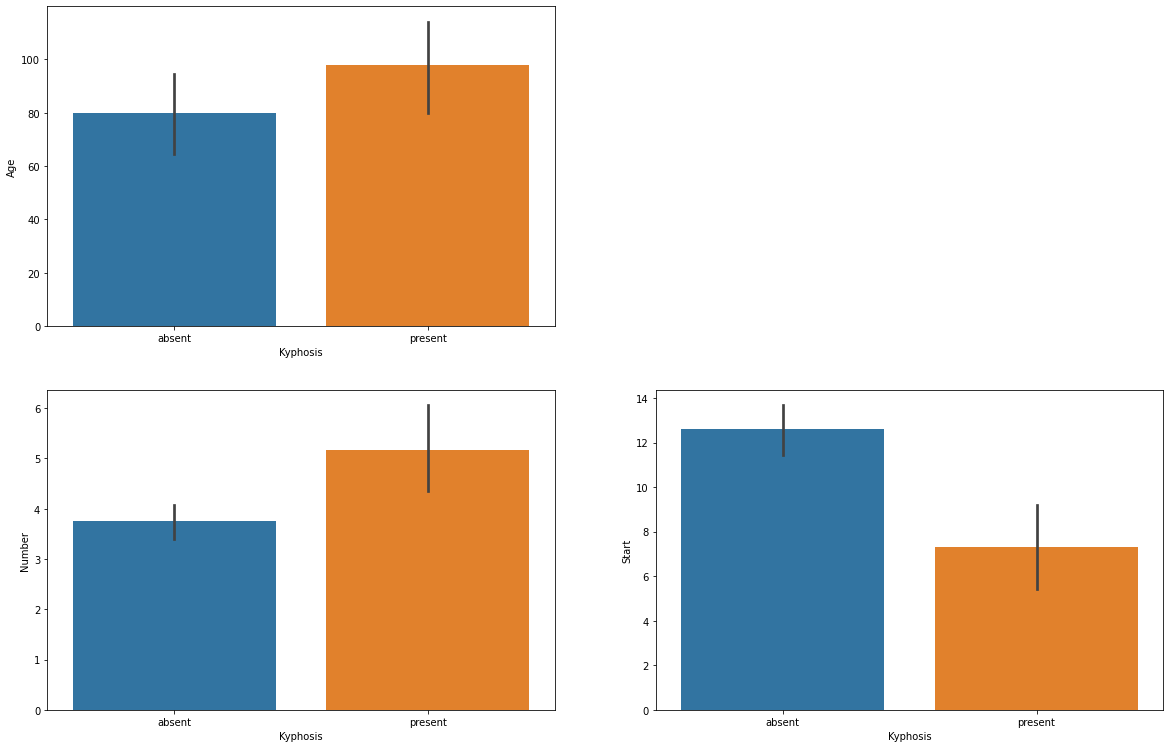

In [10]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.barplot(y= 'Age', x = 'Kyphosis', data = data)
plt.subplot(323)
sns.barplot(y = 'Number', x= 'Kyphosis', data = data)
plt.subplot(324)
sns.barplot(y= 'Start', x = 'Kyphosis', data = data)


<AxesSubplot:xlabel='Age', ylabel='count'>

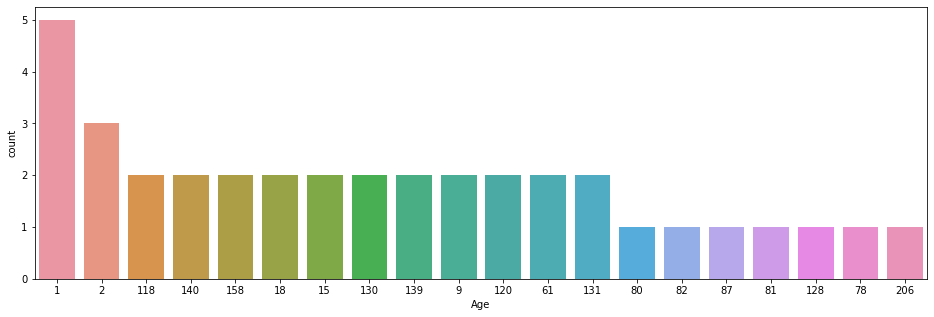

In [11]:
plt.figure(figsize=(16,5))
sns.countplot(x='Age',data = data,order = data['Age'].value_counts().iloc[:20].index)

# Data Pre-processing and cleaning

###   The appropriate preprocessing of the data like identifying NULL or Missing Values if
        

In [12]:
data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

### handling of outliers if present in the dataset, skewed data etc

C:\Users\Ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

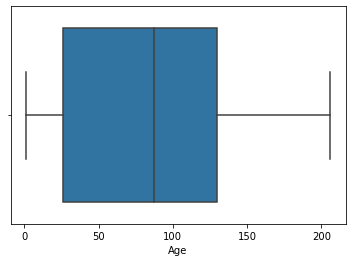

In [13]:
sns.boxplot(data["Age"],orient='a')

# visualization of data

In [14]:
data['Age'].unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36],
      dtype=int64)

In [15]:
data['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [16]:
data['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [17]:
for col in data:
     if(col=='Kyphosis'):
            data[col]= data[col].map({'absent':0,'present':1})
            

In [18]:
data['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [19]:
data2=data

In [20]:
data3=data

# Data Preparation

# Final feature selection and extract them into Column X and the class label into¶

In [21]:
x=data.drop(['Kyphosis'],axis=1)
y=data['Kyphosis']

In [22]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


## Split the dataset into training and test sets.


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [24]:
x_train.shape,x_test.shape

((64, 3), (17, 3))

# Model Building

### LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=reg.predict(x_test)

### FIND MEAN SQUARED ERROR

In [29]:
from sklearn import metrics 
mse=metrics.mean_squared_error(y_test,y_pred)
print("Mean_squared_error:",mse)


Mean_squared_error: 0.14040026571265327


In [30]:
rmse=np.sqrt(mse)
print("Root_Mean_squared_Error:",rmse)

Root_Mean_squared_Error: 0.3747002344710412


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data)

In [32]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[-4.11193713e-18  1.00057137e-16 -1.36550579e-16 -9.04626168e-17]
[1. 1. 1. 1.]


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)

In [35]:
print('means (Age, Number and Start): ', data_scaled.mean(axis=0))
print('std (Age, Number and Start): ', data_scaled.std(axis=0))

means (Age, Number and Start):  [0.20987654 0.40319181 0.25617284 0.61728395]
std (Age, Number and Start):  [0.40722031 0.28168034 0.20117444 0.28551298]


# LogisticRegression

In [36]:
x=data2.drop(['Kyphosis'],axis=1)
y=data2['Kyphosis']

In [38]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [41]:
from sklearn.linear_model import LogisticRegression

In [51]:
log_reg = LogisticRegression()

In [56]:
y_pred=log_reg.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [54]:
_pred

array([ 0.53820725,  0.46803457,  0.53111856,  0.12358006,  0.03948527,
        0.62288947, -0.07338051,  0.16988687,  0.19900625, -0.08536716,
       -0.07040892,  0.50739337,  0.57821532,  0.07217277,  0.23283927,
        0.22778633,  0.00477111])

# Check accuracy

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [50]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy_Score:", acc)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [55]:
confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# K-Nearst Neighbor

In [57]:
x=data3.drop(['Kyphosis'],axis=1)
y=data3['Kyphosis']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
k_range=list(range(3,10))
acc=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))

In [61]:
acc

[0.7647058823529411,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058]